In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [122]:
df = pd.read_csv('houseprice.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [123]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().sum().count()).sort_values(ascending=False)
missing_data= pd.concat([total,percent],axis=1,keys=['TOTAL_MISSING','PERCENTAGE_RATE'])
missing_data

,TOTAL_MISSING,PERCENTAGE_RATE
PoolQC,1453,17.938272
MiscFeature,1406,17.358025
Alley,1369,16.901235
Fence,1179,14.555556
FireplaceQu,690,8.518519
...,...,...
ExterQual,0,0.000000
Exterior2nd,0,0.000000
Exterior1st,0,0.000000
RoofMatl,0,0.000000


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [125]:
df['MSZoning'].replace({'RL':1, 'RM':2, 'C (all)':3, 'FV':4,'RH':5},inplace=True)
df['Street'].replace({'Pave':1, 'Grvl':2},inplace=True)
df['Alley'].replace({"'nan'":1, 'Grvl':2, 'Pave':3},inplace=True)
df['LotShape'].replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4},inplace=True)
df['LandContour'].replace({'Lvl':1, 'Bnk':2, 'Low':3, 'HLS':4,},inplace=True)
df['Utilities'].replace({'AllPub':1, 'NoSeWa':2},inplace=True)
df['LotConfig'].replace({'Inside':1, 'FR2':2, 'Corner':3, 'CulDSac':4, 'FR3':5},inplace=True)
df['LandSlope'].replace({'Gtl':1, 'Mod':2, 'Sev':3},inplace=True)
# df['Neighborhood'].replace({'CollgCr':1, 'Veenker':2, 'Crawfor':3, 'NoRidge':4, 'Mitchel':5, 'Somerst':6,
#        'NWAmes':7, 'OldTown':8, 'BrkSide':9, 'Sawyer':10, 'NridgHt':11, 'NAmes':12,
#        'SawyerW':13, 'IDOTRR':14, 'MeadowV':15, 'Edwards':16, 'Timber':17, 'Gilbert':18, 'StoneBr':19},inplace=True)
df['Condition1'].replace({'Norm':1, 'Feedr':2, 'PosN':3, 'Artery':4, 'RRAe':5, 'RRNn':6, 'RRAn':7, 'PosA':8, 'RRNe':9},inplace=True)
df['Condition2'].replace({'Norm':1, 'Artery':2, 'RRNn':3, 'Feedr':4, 'PosN':5, 'PosA':6, 'RRAn':7, 'RRAe':8},inplace=True)
df['BldgType'].replace({'1Fam':1, '2fmCon':2, 'Duplex':3, 'TwnhsE':4, 'Twnhs':5},inplace=True)
df['HouseStyle'].replace({'2Story':1, '1Story':2, '1.5Fin':3, '1.5Unf':4, 'SFoyer':5, 'SLvl':6, '2.5Unf':7,'2.5Fin':8},inplace=True)
df['RoofStyle'].replace({'Gable':1, 'Hip':2, 'Gambrel':3, 'Mansard':4, 'Flat':5, 'Shed':6},inplace=True)
df['RoofMatl'].replace({'CompShg':1, 'WdShngl':2, 'Metal':3, 'WdShake':4, 'Membran':5, 'Tar&Grv':6,'Roll':7, 'ClyTile':8},inplace=True)
df['Exterior1st'].replace({'VinylSd':1, 'MetalSd':2, 'Wd Sdng':3, 'HdBoard':4, 'BrkFace':5, 'WdShing':6,'CemntBd':7, 'Plywood':8, 'AsbShng':9, 
'Stucco':10,'BrkComm':11, 'AsphShn':12,'Stone':13, 'ImStucc':14, 'CBlock':15},inplace=True)
df['Exterior2nd'].replace({'VinylSd':1, 'MetalSd':2, 'Wd Shng':3, 'HdBoard':4, 'Plywood':5, 'Wd Sdng':6, 'CmentBd':7, 'BrkFace':8, 'Stucco':9, 
'AsbShng':10, 'Brk Cmn':11, 'ImStucc':12, 'AsphShn':13, 'Stone':14, 'Other':15, 'CBlock':16},inplace=True)
df['MasVnrType'].replace({'BrkFace':1, 'None':2, 'Stone':3, 'BrkCmn':4, 'nan':5},inplace=True)
df['ExterQual'].replace({'Gd':1, 'TA':2, 'Ex':3, 'Fa':4},inplace=True)
df['ExterCond'].replace({'TA':1, 'Gd':2, 'Fa':3, 'Po':4, 'Ex':5},inplace=True)
df['Foundation'].replace({'PConc':1, 'CBlock':2, 'BrkTil':3, 'Wood':4, 'Slab':5, 'Stone':6},inplace=True)
df['BsmtQual'].replace({'Gd':1, 'TA':2, 'Ex':3, 'nan':4, 'Fa':5},inplace=True)
df['BsmtCond'].replace({'TA':1, 'Gd':2, 'nan':3, 'Fa':4, 'Po':5},inplace=True)
df['BsmtExposure'].replace({'No':1, 'Gd':2, 'Mn':3, 'Av':4, 'nan':5},inplace=True)
df['BsmtFinType1'].replace({'GLQ':1, 'ALQ':2, 'Unf':3, 'Rec':4, 'BLQ':5, 'nan':6, 'LwQ':7},inplace=True)
df['BsmtFinType2'].replace({'Unf':1, 'BLQ':2, 'nan':3, 'ALQ':4, 'Rec':5, 'LwQ':6, 'GLQ':7},inplace=True)
df['Heating'].replace({'GasA':1, 'GasW':2, 'Grav':3, 'Wall':4, 'OthW':5, 'Floor':6},inplace=True)
df['HeatingQC'].replace({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5},inplace=True)
df['CentralAir']=pd.get_dummies(df['CentralAir'],drop_first=True)
df['Electrical'].replace({'SBrkr':1, 'FuseF':2, 'FuseA':3, 'FuseP':4, 'Mix':5, 'nan':6},inplace=True)
df['KitchenQual'].replace({'Gd':1, 'TA':2, 'Ex':3, 'Fa':4},inplace=True)
df['Functional'].replace({'Typ':1, 'Min1':2, 'Maj1':3, 'Min2':4, 'Mod':5, 'Maj2':6, 'Sev':7},inplace=True)
df['FireplaceQu'].replace({'nan':1, 'TA':2, 'Gd':3, 'Fa':4, 'Ex':5, 'Po':6},inplace=True)
df['GarageType'].replace({'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'CarPort':4, 'nan':5, 'Basment':6, '2Types':7},inplace=True)
df['GarageFinish'].replace({'RFn':1, 'Unf':2, 'Fin':3, 'nan':4},inplace=True)
df['GarageQual'].replace({'TA':1, 'Fa':2, 'Gd':3, 'nan':4, 'Ex':5, 'Po':6},inplace=True)
df['GarageCond'].replace({'TA':1, 'Fa':2, 'nan':3, 'Gd':4, 'Po':5, 'Ex':6},inplace=True)
df['PavedDrive'].replace({'Y':1, 'N':2, 'P':3},inplace=True)
df['PoolQC'].replace({'nan':1, 'Ex':2, 'Fa':3,'Gd':4},inplace=True)
df['Fence'].replace({'nan':1, 'MnPrv':2, 'GdWo':3, 'GdPrv':4, 'MnWw':5},inplace=True)
df['MiscFeature'].replace({'nan':1, 'Shed':2, 'Gar2':3, 'Othr':4, 'TenC':5},inplace=True)
df['SaleType'].replace({'WD':1, 'New':2, 'COD':3, 'ConLD':4, 'ConLI':5, 'CWD':6, 'ConLw':7, 'Con':8, 'Oth':9},inplace=True)
df['SaleCondition'].replace({'Normal':1, 'Abnorml':2, 'Partial':3, 'AdjLand':4, 'Alloca':5, 'Family':6},inplace=True)


In [126]:
# df['SaleCondition'].unique()
df['LotShape'].unique()

array([1, 2, 3, 4], dtype=int64)

In [127]:
cat_veriable = ['LotFrontage','Alley','Neighborhood','MasVnrType','MasVnrArea','BsmtQual','BsmtCond' ,'BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu','GarageType',
'GarageYrBlt','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
enc = LabelEncoder()
for col in cat_veriable:
    df[col] = enc.fit_transform(df[col])
    

In [128]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,1,36,8450,1,2,1,1,1,...,0,3,4,4,0,2,2008,1,1,208500
1,2,20,1,51,9600,1,2,1,1,1,...,0,3,4,4,0,5,2007,1,1,181500
2,3,60,1,39,11250,1,2,2,1,1,...,0,3,4,4,0,9,2008,1,1,223500
3,4,70,1,31,9550,1,2,2,1,1,...,0,3,4,4,0,2,2006,1,2,140000
4,5,60,1,55,14260,1,2,2,1,1,...,0,3,4,4,0,12,2008,1,1,250000


In [129]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,1,33,7917,1,2,1,1,1,...,0,3,4,4,0,8,2007,1,1,175000
1456,1457,20,1,56,13175,1,2,1,1,1,...,0,3,0,4,0,2,2010,1,1,210000
1457,1458,70,1,37,9042,1,2,1,1,1,...,0,3,2,0,2500,5,2010,1,1,266500
1458,1459,20,1,39,9717,1,2,1,1,1,...,0,3,4,4,0,4,2010,1,1,142125
1459,1460,20,1,46,9937,1,2,1,1,1,...,0,3,4,4,0,6,2008,1,1,147500


In [130]:
x = df.drop('SaleType',axis=1)
y = df['SaleType']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [131]:
model1 = RandomForestClassifier()
model1.fit(x_train,y_train)

RandomForestClassifier()

In [132]:
pred1 = model1.predict(x_test)
pred1

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2], dtype=int64)

In [133]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97       255
           2       1.00      0.92      0.96        24
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1

    accuracy                           0.95       292
   macro avg       0.24      0.24      0.24       292
weighted avg       0.91      0.95      0.93       292



e:\ANA2022\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\ANA2022\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\ANA2022\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AxesSubplot(0.125,0.125;0.62x0.755)


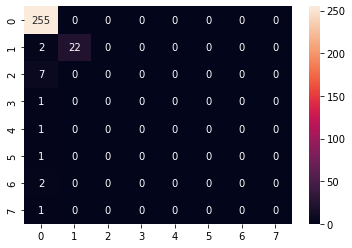

In [134]:
print(sns.heatmap(confusion_matrix(y_test,pred1),annot =True,fmt='0.5g'))

In [135]:
print('MAE',mean_absolute_error(y_test,pred1))
print('MSE',mean_squared_error(y_test,pred1))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred1)))

MAE 0.1643835616438356
MSE 0.7397260273972602
RMSE 0.8600732686214938


In [136]:
model2 = LogisticRegression()
model2.fit(x_train,y_train)

e:\ANA2022\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [137]:
pred2 = model2.predict(x_test)
pred2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [138]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           1       0.88      0.98      0.93       255
           2       0.33      0.12      0.18        24
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1

    accuracy                           0.86       292
   macro avg       0.15      0.14      0.14       292
weighted avg       0.80      0.86      0.82       292



e:\ANA2022\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\ANA2022\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\ANA2022\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AxesSubplot(0.125,0.125;0.62x0.755)


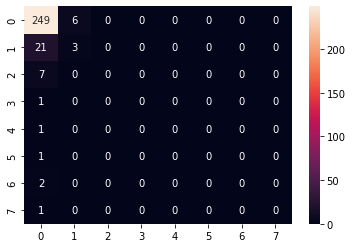

In [139]:
print(sns.heatmap(confusion_matrix(y_test,pred2),annot =True,fmt='0.5g'))

In [140]:
MPLMODEL = MLPClassifier(solver = 'adam',hidden_layer_sizes=(100,),activation='logistic')
MPLMODEL.fit(x_train,y_train)

MLPClassifier(activation='logistic')

In [141]:
mlppred1 = MPLMODEL.predict(x_test)
mlppred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

e:\ANA2022\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\ANA2022\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\ANA2022\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.87      1.00      0.93       255
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1

    accuracy                           0.87       292
   macro avg       0.11      0.12      0.12       292
weighted avg       0.76      0.87      0.81       292

AxesSubplot(0.125,0.125;0.62x0.755)


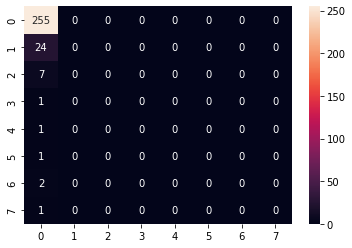

In [142]:
print(classification_report(y_test,mlppred1))
print(sns.heatmap(confusion_matrix(y_test,mlppred1),annot =True,fmt='0.5g'))